In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/')
classes = {'adenocarcinoma':0, 'large_cell_carcinoma':1, 'normal':2, 'squamous_cell_carcinoma':3}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2, 3])

In [6]:
pd.Series(Y).value_counts()

0    195
3    155
2    148
1    115
dtype: int64

In [7]:
X.shape, X_updated.shape

((613, 200, 200), (613, 40000))

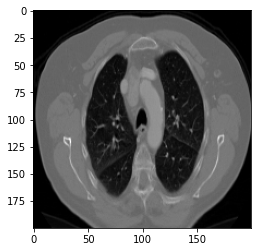

In [89]:
plt.imshow(X[0], cmap='gray')

In [90]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(613, 40000)

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [94]:
xtrain.shape, xtest.shape

((490, 40000), (123, 40000))

In [95]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [96]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(490, 40000) (123, 40000)


In [102]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [103]:
model.fit(xtrain, ytrain)

GaussianNB()

In [105]:
print("Training Score:", model.score(xtrain, ytrain))
print("Testing Score:", model.score(xtest, ytest))

Training Score: 0.6244897959183674
Testing Score: 0.5934959349593496


In [106]:
pred = model.predict(xtest)

In [107]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3,   5,   7,   8,  12,  23,  24,  25,  26,  27,  29,  30,  33,
         35,  40,  41,  44,  48,  49,  52,  55,  57,  58,  59,  60,  63,
         64,  66,  68,  69,  75,  76,  79,  80,  91,  94,  97,  98,  99,
        102, 104, 105, 107, 109, 110, 114, 115, 117, 121, 122], dtype=int64),)

In [108]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  50
0 0


In [109]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

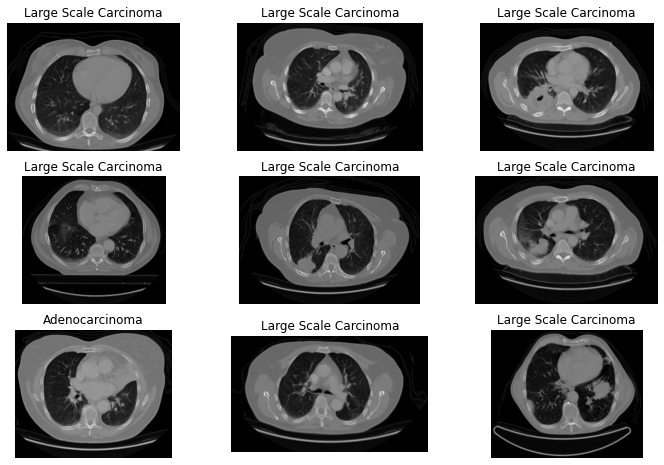

In [111]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

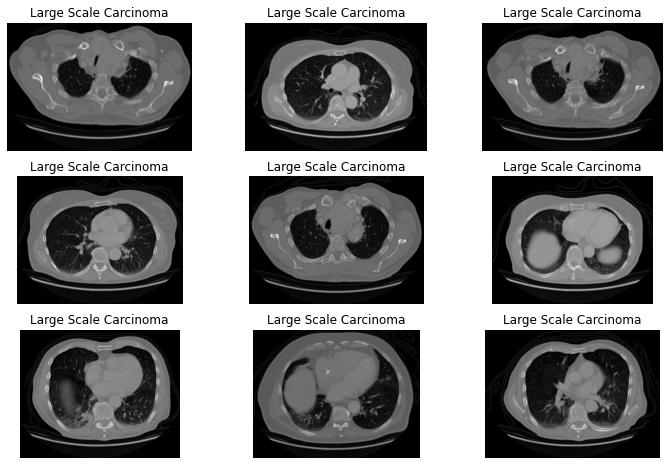

In [112]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

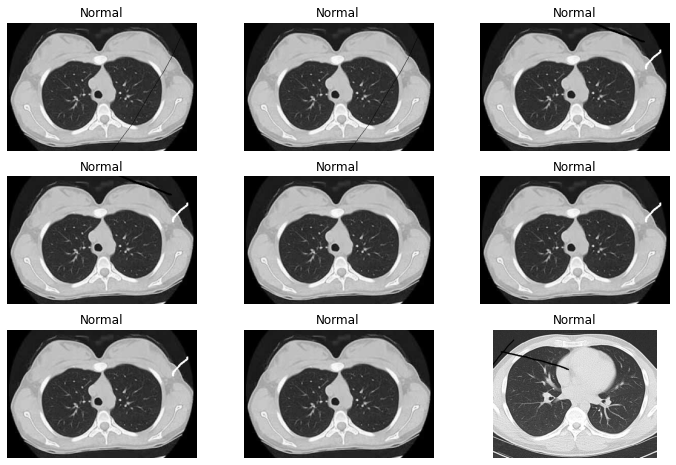

In [113]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

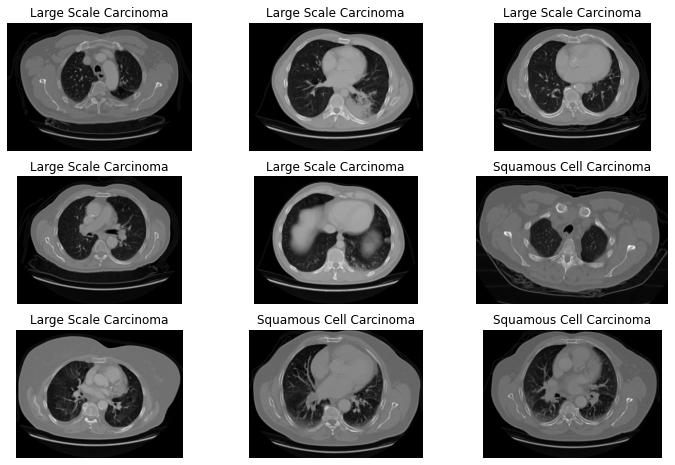

In [114]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [116]:
model_accuracy_score=model.score(xtest,ytest)*100
model_accuracy_percent=round(model_accuracy_score,2)
print("The Accuracy Percentage of Naives Bayes Model is",model_accuracy_percent,"%")

The Accuracy Percentage of Naives Bayes Model is 59.35 %


# Comparison

In [117]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [119]:
lg_accuracy_score=lg.score(xtest,ytest)*100
lg_accuracy_percent=round(lg_accuracy_score,2)
print("The Accuracy Percentage of Logistic Regression is",lg_accuracy_percent,"%")

The Accuracy Percentage of Logistic Regression is 83.74 %


In [121]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [122]:
svm_accuracy_score=sv.score(xtest,ytest)*100
svm_accuracy_percent=round(svm_accuracy_score,2)
print("The Accuracy Percentage of SVM is",svm_accuracy_percent,"%")

The Accuracy Percentage of SVM is 78.05 %


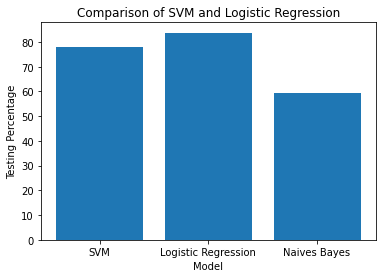

In [127]:
# Create a bar chart
plt.bar(['SVM', 'Logistic Regression','Naives Bayes'], [svm_accuracy_percent, lg_accuracy_percent,model_accuracy_percent])

# Set the axis labels and title
plt.xlabel('Model')
plt.ylabel('Testing Percentage')
plt.title('Comparison of SVM and Logistic Regression')

# Show the plot
plt.show()